<a href="https://colab.research.google.com/github/harihardiyan/AtomJAX/blob/main/notebooks/AtomJAX_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip uninstall atomjax -y
!pip install git+https://github.com/harihardiyan/AtomJAX.git

Found existing installation: atomjax 0.1.0
Uninstalling atomjax-0.1.0:
  Successfully uninstalled atomjax-0.1.0
  Cloning https://github.com/harihardiyan/AtomJAX.git to /tmp/pip-req-build-vercdd98
  Running command git clone --filter=blob:none --quiet https://github.com/harihardiyan/AtomJAX.git /tmp/pip-req-build-vercdd98
  Resolved https://github.com/harihardiyan/AtomJAX.git to commit 9d36a73afb84c6944cf64aafdccf861fe5d0def7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for atomjax: filename=atomjax-0.1.0-py3-none-any.whl size=6613 sha256=c45b2c373cf06fbbd85b5c1444509daec3d0183bf5f65162392655df4ff97069
  Stored in directory: /tmp/pip-ephem-wheel-cache-jagbeq38/wheels/78/9a/4b/03b1c92b0f23fb0d96326efa4c08874780dfb924c8713b4ea4
Successfully built atomjax


In [ ]:

# AtomJAX: High-Precision Radial Schrödinger Solver Tutorial
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/harihardiyan/AtomJAX/blob/main/notebooks/AtomJAX_Tutorial.ipynb)

This notebook demonstrates how to use **AtomJAX** to solve the radial Schrödinger equation for hydrogenic atoms.

**Authors:** Hari Hardiyan & Microsoft Copilot
**Framework:** JAX-native, 4th-order Finite Difference (FD4)

In [1]:

# Install atomjax directly from GitHub
!pip install git+https://github.com/harihardiyan/AtomJAX.git

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from atomjax.solvers import solve_hydrogen_state
from atomjax.observables import calculate_observables

# Enable float64 for high precision
jax.config.update("jax_enable_x64", True)
print("JAX Version:", jax.__version__)

  Cloning https://github.com/harihardiyan/AtomJAX.git to /tmp/pip-req-build-wogn52kn
  Running command git clone --filter=blob:none --quiet https://github.com/harihardiyan/AtomJAX.git /tmp/pip-req-build-wogn52kn
  Resolved https://github.com/harihardiyan/AtomJAX.git to commit 9d36a73afb84c6944cf64aafdccf861fe5d0def7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
JAX Version: 0.7.2


In [ ]:

## 1. Single State Calculation
We start by solving for the Ground State ($n=1, \ell=0$) of a Hydrogen atom ($Z=1$).

In [2]:

Z = 1.0
n = 1
ell = 0

energy, wavefunction, grid = solve_hydrogen_state(Z, n, ell)

print(f"Calculated Energy: {energy:.10f} Ha")
print(f"Analytical Energy: {-0.5 * Z**2 / n**2:.10f} Ha")
print(f"Relative Error: {abs(energy - (-0.5 * Z**2 / n**2)):.2e}")

Calculated Energy: -0.4992162435 Ha
Analytical Energy: -0.5000000000 Ha
Relative Error: 7.84e-04


In [ ]:

## 2. Vectorized Batching (The JAX Way)
One of AtomJAX's strengths is the ability to solve for multiple atoms (different $Z$) simultaneously using `jax.vmap`.

In [3]:

# Define a range of Atomic Charges
zs = jnp.arange(1.0, 11.0) # Z from 1 to 10

# Vectorize the solver
batch_solver = jax.vmap(lambda z: solve_hydrogen_state(z, n=2, ell=1))

# Execute in parallel
energies, wavefunctions, grids = batch_solver(zs)

print("Energies for Z=1 to 10 (n=2, l=1):")
print(energies)

Energies for Z=1 to 10 (n=2, l=1):
[ -0.12500001  -0.50000003  -1.12500007  -2.00000013  -3.1250002
  -4.50000028  -6.12500039  -8.0000005  -10.12500064 -12.50000079]


In [ ]:
## 3. Wavefunction Visualization
Let's plot the radial wavefunctions $u(r)$ for different $Z$.

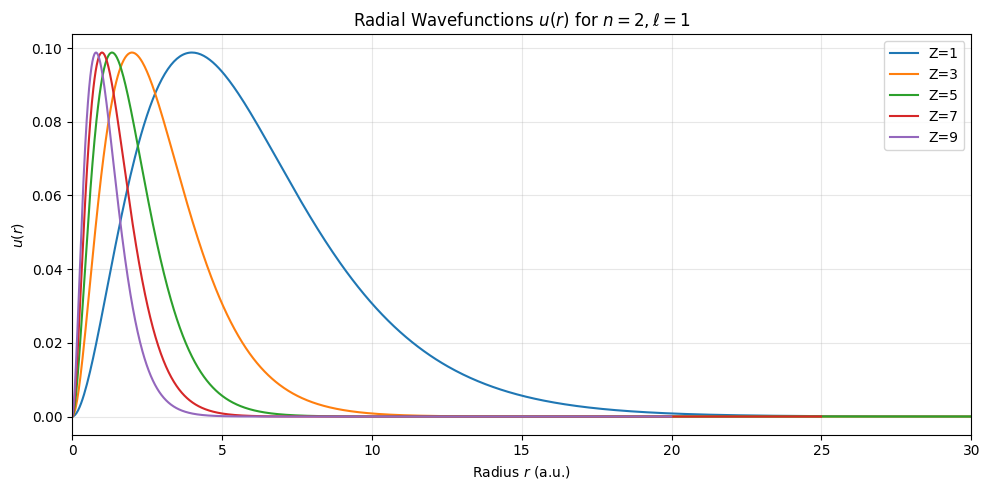

In [5]:

plt.figure(figsize=(10, 5))
for i, z in enumerate(zs[::2]):
    plt.plot(grids.r[i], wavefunctions[i], label=f"Z={z:.0f}")

plt.title(r"Radial Wavefunctions $u(r)$ for $n=2, \ell=1$")
plt.xlabel(r"Radius $r$ (a.u.)")
plt.ylabel(r"$u(r)$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 30)
plt.tight_layout()
plt.show()